In [1]:
from gensim import models

In [2]:
word2vec = models.Word2Vec.load('./embedding/ko/ko.bin')

# 크롤링 (21.2.2 까지 하자)

- 다음 뉴스 사회 뉴스. 6.7부터 2.2까지 37500 + 27000개를 크롤링
- 기사 본문이 3문단(\<p>) 이상이어야 함.

In [6]:
import requests
from fake_useragent import UserAgent
from tqdm import tqdm
import time

In [18]:
dates = [20210607, 20210606, 20210605,20210604,20210603,20210602,20210601,20210531,
        20210530,20210529,20210528,20210527,20210526,20210525,20210524,20210523,20210522,
        20210521,20210520,20210519,20210518,20210517, 20210516, 20210515, 20210514,
        20210512, 20210510, 20210508,20210506,20210504,20210502,20210430,20210428,
        20210426,20210424,20210422,20210420,20210418,20210416,20210414,20210412,20210410,
        20210330,20210328,20210326,20210324,20210322, 20210320, 20210318, 20210316,
        20210314,20210312,20210310,20210308,20210306,20210304,20210302, 20210226,
        20210224,20210222,20210220,20210202]

In [13]:
headers = {'user-agent' : UserAgent().chrome}
data = {}
data['articles'] = []
data['titles'] = []

for date in dates:
    print(date)
    for i in tqdm(range(1, page+1)):
        time.sleep(1)
        response=  requests.get('https://news.daum.net/breakingnews/society?page={}&regDate={}'.format(i, date), headers=headers)
        doc = BeautifulSoup(response.text,'html5lib')
        links = doc.select('#mArticle > div.box_etc > ul > li > div > strong > a')
        links = [links[i].attrs['href'] for i in range(len(links))]
        for link in links:
            response = requests.get(link, headers=headers)
            doc = BeautifulSoup(response.text, 'html5lib')
            title = doc.select('#cSub > div > h3')[0].get_text()
            doc = doc.select('#harmonyContainer > section > p')
            if len(doc) >=3:
                article = [doc[i].get_text() for i in range(len(doc))][:3]
                data['articles'].append(article)
                data['titles'].append(title)

  0%|          | 0/50 [00:00<?, ?it/s]

20210326


  0%|          | 0/50 [00:00<?, ?it/s]

20210324


  0%|          | 0/50 [00:00<?, ?it/s]

20210322


  0%|          | 0/50 [00:00<?, ?it/s]

20210320


  0%|          | 0/50 [00:00<?, ?it/s]

20210318


  0%|          | 0/50 [00:00<?, ?it/s]

20210316


 72%|███████▏  | 36/50 [03:25<01:22,  5.91s/it]

페이지 안에서 과부하


  0%|          | 0/50 [00:00<?, ?it/s]

20210314


  0%|          | 0/50 [00:00<?, ?it/s]

20210312


  0%|          | 0/50 [00:00<?, ?it/s]

20210310


  0%|          | 0/50 [00:00<?, ?it/s]

20210308


  0%|          | 0/50 [00:00<?, ?it/s]

20210306


  0%|          | 0/50 [00:00<?, ?it/s]

20210304


  0%|          | 0/50 [00:00<?, ?it/s]

20210302


 20%|██        | 10/50 [00:59<04:02,  6.07s/it]

페이지 안에서 과부하


  0%|          | 0/50 [00:00<?, ?it/s]

20210226


 78%|███████▊  | 39/50 [03:59<01:15,  6.86s/it]

페이지 안에서 과부하


  0%|          | 0/50 [00:00<?, ?it/s]

20210224


  0%|          | 0/50 [00:00<?, ?it/s]

20210222


  0%|          | 0/50 [00:00<?, ?it/s]

20210220


  0%|          | 0/50 [00:00<?, ?it/s]

20210202


100%|██████████| 50/50 [04:53<00:00,  5.87s/it]


In [16]:
final = pd.concat([final, pd.DataFrame(data2)], axis=0)
final

,Unnamed: 0,Unnamed: 0.1,articles,titles
0,0.0,0.0,['주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 ...,"파주시의회 행감 돌입..""다양한 해법-대안 제시"""
1,1.0,1.0,"[""'성수기를 피해 소규모 가족 단위로, 짧게.'"", '정부가 발표한 휴가철 방역 ...","휴가철 방역대책..""짧게·소규모로·나눠서"""
2,2.0,2.0,"[""웹툰 ‘마음의 소리’와 ‘조의 영역'으로 인기를 얻은 웹툰 작가 조석(38)이 ...","'마음의 소리' 조석 작가 ""덜컥 폐결핵, 결국 담배 때문에.."""
3,3.0,3.0,['7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을...,"세월호 특검, 서해해경청·목포해경 압수수색"
4,4.0,4.0,"['제주상공회의소(회장 양문석)와 제주도관광협회(회장 부동석)가 주최하고, 제주도·...","제주상의·관광협회, ESG 기반 지속가능경영 구축 '속도'"
...,...,...,...,...
11411,NaN,NaN,[이른바 '검언유착 의혹'으로 구속기소된 이동재 전 채널A 기자의 구속 기간이 4일...,'검언유착 의혹' 이동재 전 채널A 기자 4일 석방..구속 292일 만
11412,NaN,NaN,"[(서울=뉴스1) 문동주 기자,김동은 기자 = 22년 차 배달기사 이씨(48)는 음...","[영상] ""냄새난다고 화물용 승강기 타래요""..도 넘은 '갑질'에 뿔난 배달기사들"
11413,NaN,NaN,[(서울=뉴스1) 전준우 기자 = 서울 중랑구에서 신종 코로나바이러스 감염증(코로나...,중랑구서 확진자 9명 추가..2명은 광진구 음식점 관련
11414,NaN,NaN,[ [이데일리 함정선 기자] 국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 ...,"콜센터 파업 장기화하나..건보공단 ""위탁업체 정직원..직고용 어려워"""


In [17]:
final.to_csv('./data_in/data.csv')

# 전처리 및 EDA

In [82]:
final = pd.read_csv('./data_in/data.csv')
data = final[['articles','titles']]
data

,articles,titles
0,['주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 ...,"파주시의회 행감 돌입..""다양한 해법-대안 제시"""
1,"[""'성수기를 피해 소규모 가족 단위로, 짧게.'"", '정부가 발표한 휴가철 방역 ...","휴가철 방역대책..""짧게·소규모로·나눠서"""
2,"[""웹툰 ‘마음의 소리’와 ‘조의 영역'으로 인기를 얻은 웹툰 작가 조석(38)이 ...","'마음의 소리' 조석 작가 ""덜컥 폐결핵, 결국 담배 때문에.."""
3,['7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을...,"세월호 특검, 서해해경청·목포해경 압수수색"
4,"['제주상공회의소(회장 양문석)와 제주도관광협회(회장 부동석)가 주최하고, 제주도·...","제주상의·관광협회, ESG 기반 지속가능경영 구축 '속도'"
...,...,...
52126,"[""이른바 '검언유착 의혹'으로 구속기소된 이동재 전 채널A 기자의 구속 기간이 4...",'검언유착 의혹' 이동재 전 채널A 기자 4일 석방..구속 292일 만
52127,"['(서울=뉴스1) 문동주 기자,김동은 기자 = 22년 차 배달기사 이씨(48)는 ...","[영상] ""냄새난다고 화물용 승강기 타래요""..도 넘은 '갑질'에 뿔난 배달기사들"
52128,['(서울=뉴스1) 전준우 기자 = 서울 중랑구에서 신종 코로나바이러스 감염증(코로...,중랑구서 확진자 9명 추가..2명은 광진구 음식점 관련
52129,[' [이데일리 함정선 기자] 국민건강보험공단의 전화상담 업무를 담당하고 있는 민간...,"콜센터 파업 장기화하나..건보공단 ""위탁업체 정직원..직고용 어려워"""


- 한글이랑 숫자만 깔끔하게.. 출처 이런것도 빼고

In [83]:
import re
def first_preprocess(s):
    s = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\s\d]', ' ',s)
    s = re.sub('\s{2,}', ' ', s).lstrip().rstrip()
    s = re.sub('\w+\s{1}\w+\s{1}기자\s{1}|\w+\s{1}\w+\s{1}앵커\s{1}|\w+\s{1}앵커\s{1}', ' ', s).strip()
    s = re.sub('\w+뉴스|\w+신문|\w+데일리|뉴스1|뉴시스|한겨레|프레시안|정책브리핑|데일리안|\w+경제|한국경제|머니투데이|\w+일보|비즈니스워치|\w+비즈|머니S|더팩트|뉴스타파|아이뉴스24|\w+와이어|\w+\s셜록\s기자', ' ', s).strip()
    s = re.sub('\s{2,}',' ',s).lstrip().rstrip()
    return s

data['titles'] = data['titles'].apply(first_preprocess)
data['articles'] = data['articles'].apply(first_preprocess)

<ipython-input-83-d84f038f2d5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['titles'] = data['titles'].apply(first_preprocess)
<ipython-input-83-d84f038f2d5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['articles'] = data['articles'].apply(first_preprocess)


- 본문 길이가 0이면 제거

In [84]:
data['articles'] = data['articles'].apply(lambda x : np.nan if len(x) == 0 else x)

<ipython-input-84-ffcdf597a54b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['articles'] = data['articles'].apply(lambda x : np.nan if len(x) == 0 else x)


In [85]:
data = data.dropna().reset_index(drop=True)
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
52115,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
52116,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
52117,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
52118,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [86]:
from konlpy.tag import Okt

def text_to_morphs(s):
    return ' '.join(Okt().morphs(s))

## 본문 문장에 대한 길이 분석

In [87]:
whole_sents = list(data['articles'])
whole_sents[:20]

['주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명을 청취하고 예산결산특별위원회를 구성한다 8일부터 16일까지 집행부를 대상으로 현지 확인 업무추진사항에 대한 질의 등 2021년도 행정사무감사를 실시하고 이어 18일부터 21일까지 상임위원회별로 조례안 및 의원발의 조례안 등 20건의 안건을 심의할 예정이다 22일 제2차 본회의는 일반안건 심사보고 및 행정사무감사 결과를 청취하고 24일부터 28일까지 열릴 예산결산특별위원회는 2020회계연도 결산 승인안을 심사한다',
 '성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다 공무원과 공공기관 100인 이상 사업장은 여름 휴가기간을 2주 앞당기고 2차례 이상 나눠 쓸 것을 권고헀습니다',
 '웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 확진 판정을 받았다며 여러분은 저처럼 바보같이 담배 오래 피우지 마시고 금연하시라 고 했다 조 작가는 7일 인스타그램에 건강검진을 받고 폐결핵 소견이 있어 정밀검사를 해 봤더니 덜컥 확진을 받았다 며 갑자기 팔자에도 없던 많은 약이 생겼다 고 했다 그는 아무래도 피곤한 거 스트레스 받던 것도 있었겠지만 흡연이 가장 문제였을 것 같다 며 금연을 당부했다',
 '7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보내 이날 오전 11시부터 압수수색을 진행했다 서해해경청 압수수색은 0오후 9시 25분쯤까지 목포해경 압수수색은 0오후 7시쯤까지 진행됐다 특검팀은 세월호참사 당시 해경이 세월호 저장장치 을 수거하는 모습을 찍은 영상과 일지 등 관련 자료들을 확보한 것으로 알려졌다 지난달 출범한 세월호 특검은 세월호 복원 데이터 조작 의혹과 세월호의 블랙박스 격인 본체 수거 과정 의혹 관련 청와대 등 당시 정부 대응의 적정성 등을 수사하고 있다 특검은 최근까지 사회적참사특별조사위원회 사참위 관계자 등을 조사해 왔으며국립과학수사연구원에 디스크 원판 조사를 의뢰하기도

In [88]:
whole_sents = list(data['articles'])
token_sents = [s.split() for s in whole_sents]
token_len = [len(t) for t in token_sents]

In [89]:
print('어절 최대길이: {}'.format(np.max(token_len)))
print('어절 최소길이: {}'.format(np.min(token_len)))
print('어절 평균길이: {:.2f}'.format(np.mean(token_len)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(token_len)))
print('어절 중간길이: {}'.format(np.median(token_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(token_len, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(token_len, 95)))

어절 최대길이: 1046
어절 최소길이: 1
어절 평균길이: 59.97
어절 길이 표준편차: 33.48
어절 중간길이: 54.0
제 1 사분위 길이: 39.0
제 3 사분위 길이: 120.0


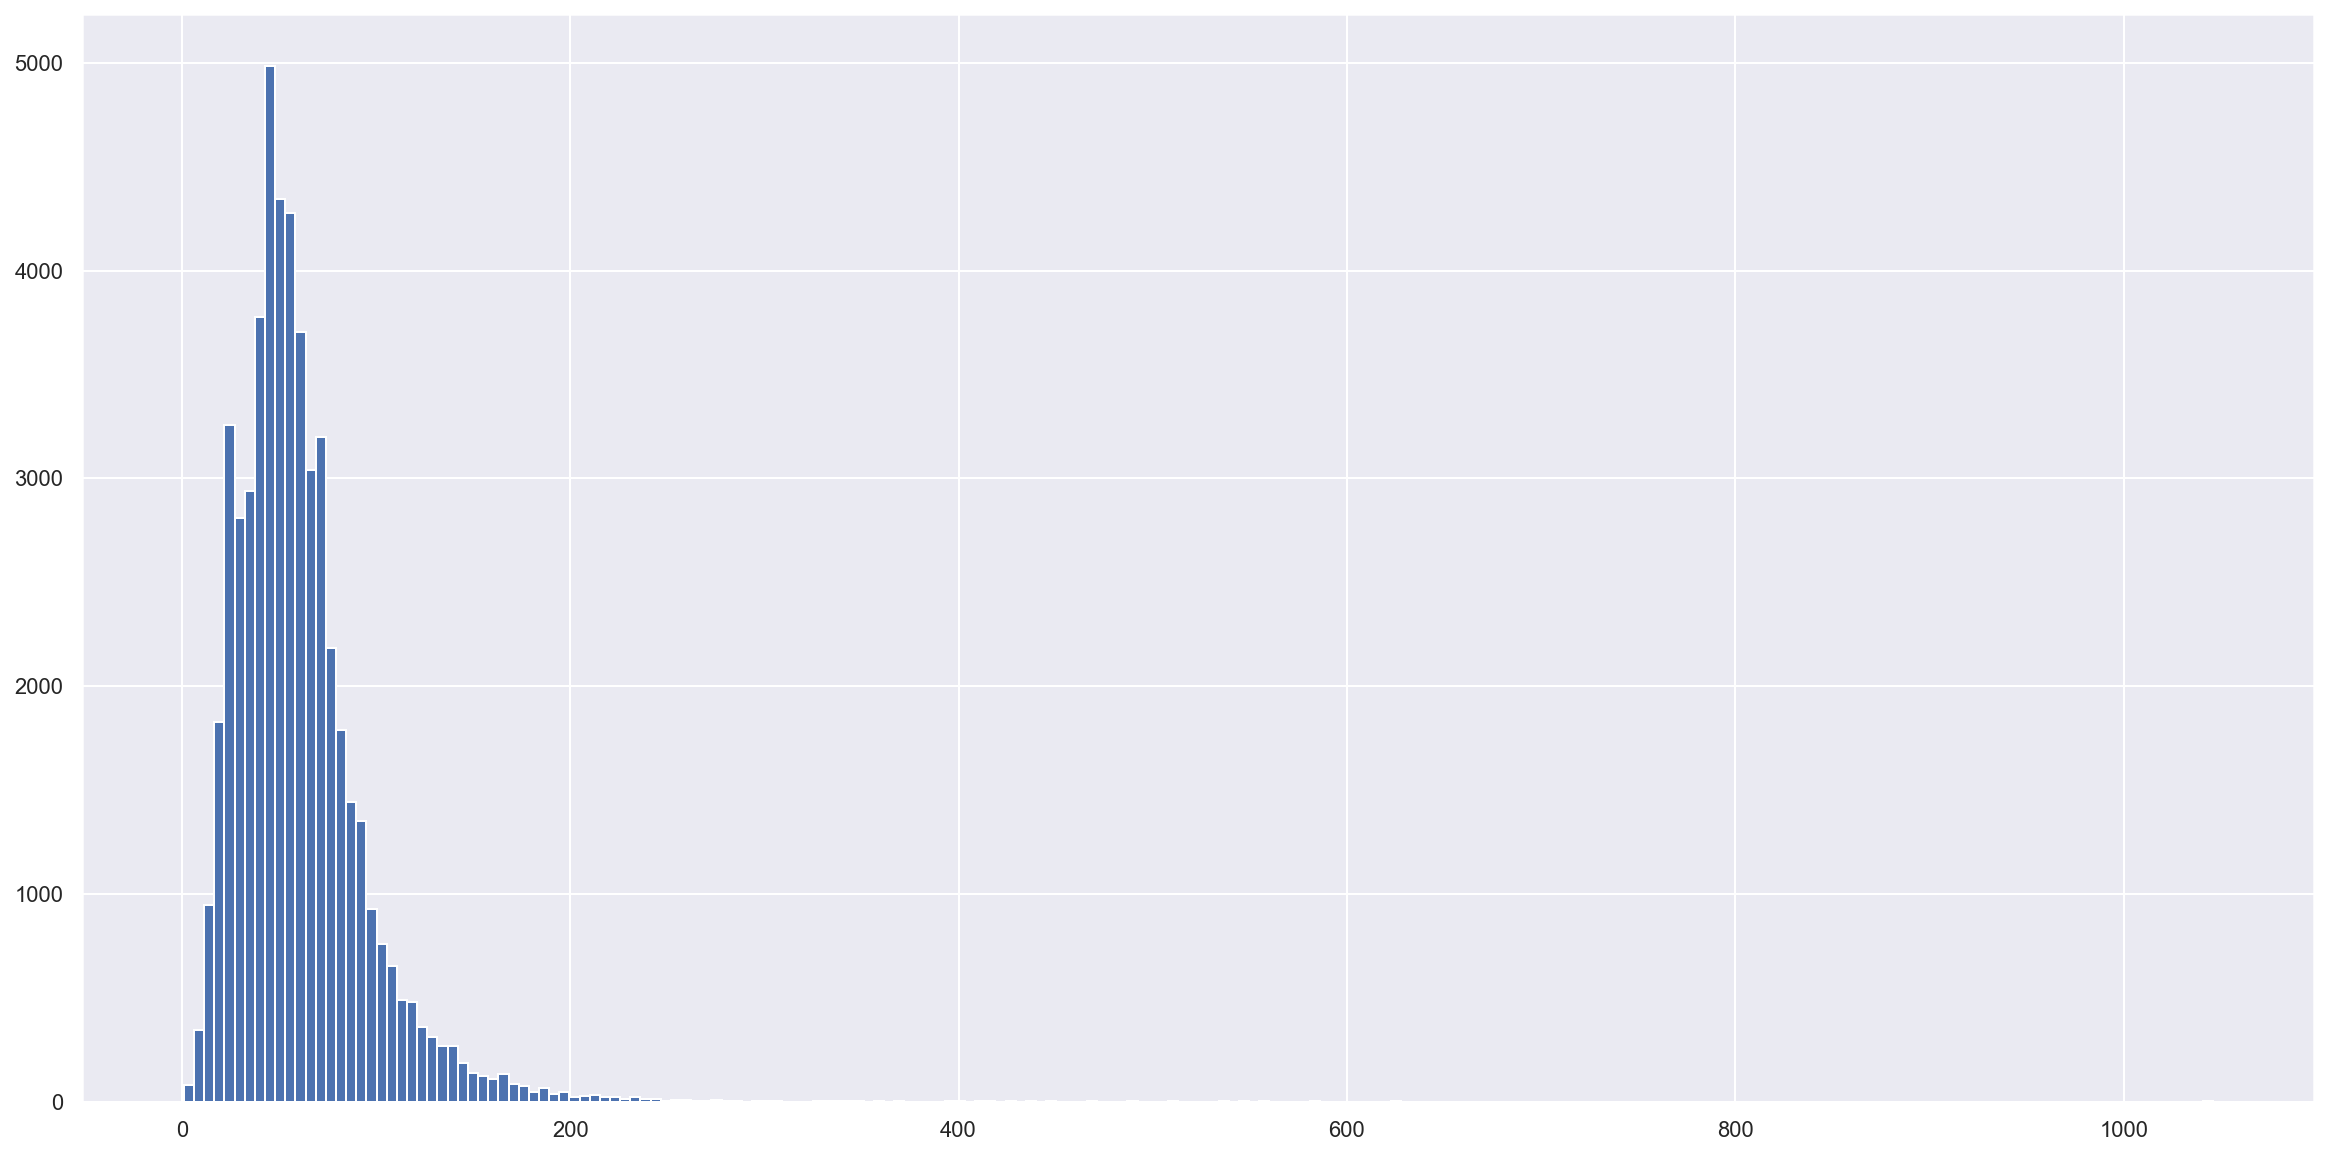

In [91]:
plt.figure(figsize=(20,10))
plt.hist(token_len, bins=200)
plt.show()

- 어절 길이 200개 이상은 제거

In [92]:
data['articles'] = data['articles'].apply(lambda x : np.nan if (len(x.split()) >= 200)  else  x)
data = data.dropna().reset_index(drop=True)
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
51854,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
51855,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
51856,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
51857,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [93]:
whole_sents = list(data['articles'])
token_sents = [s.split() for s in whole_sents]
token_len = [len(t) for t in token_sents]

In [94]:
print('어절 최대길이: {}'.format(np.max(token_len)))
print('어절 최소길이: {}'.format(np.min(token_len)))
print('어절 평균길이: {:.2f}'.format(np.mean(token_len)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(token_len)))
print('어절 중간길이: {}'.format(np.median(token_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(token_len, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(token_len, 90)))

어절 최대길이: 199
어절 최소길이: 1
어절 평균길이: 59.00
어절 길이 표준편차: 30.04
어절 중간길이: 54.0
제 1 사분위 길이: 39.0
제 3 사분위 길이: 97.0


- 어절 150개 이상 제거

In [96]:
data['articles'] = data['articles'].apply(lambda x : np.nan if (len(x.split()) >= 150)  else  x)
data = data.dropna().reset_index(drop=True)
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
51052,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
51053,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
51054,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
51055,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


어절 최대길이: 149
어절 최소길이: 1
어절 평균길이: 57.27
어절 길이 표준편차: 26.87
어절 중간길이: 54.0
제 1 사분위 길이: 25.0
제 3 사분위 길이: 94.0


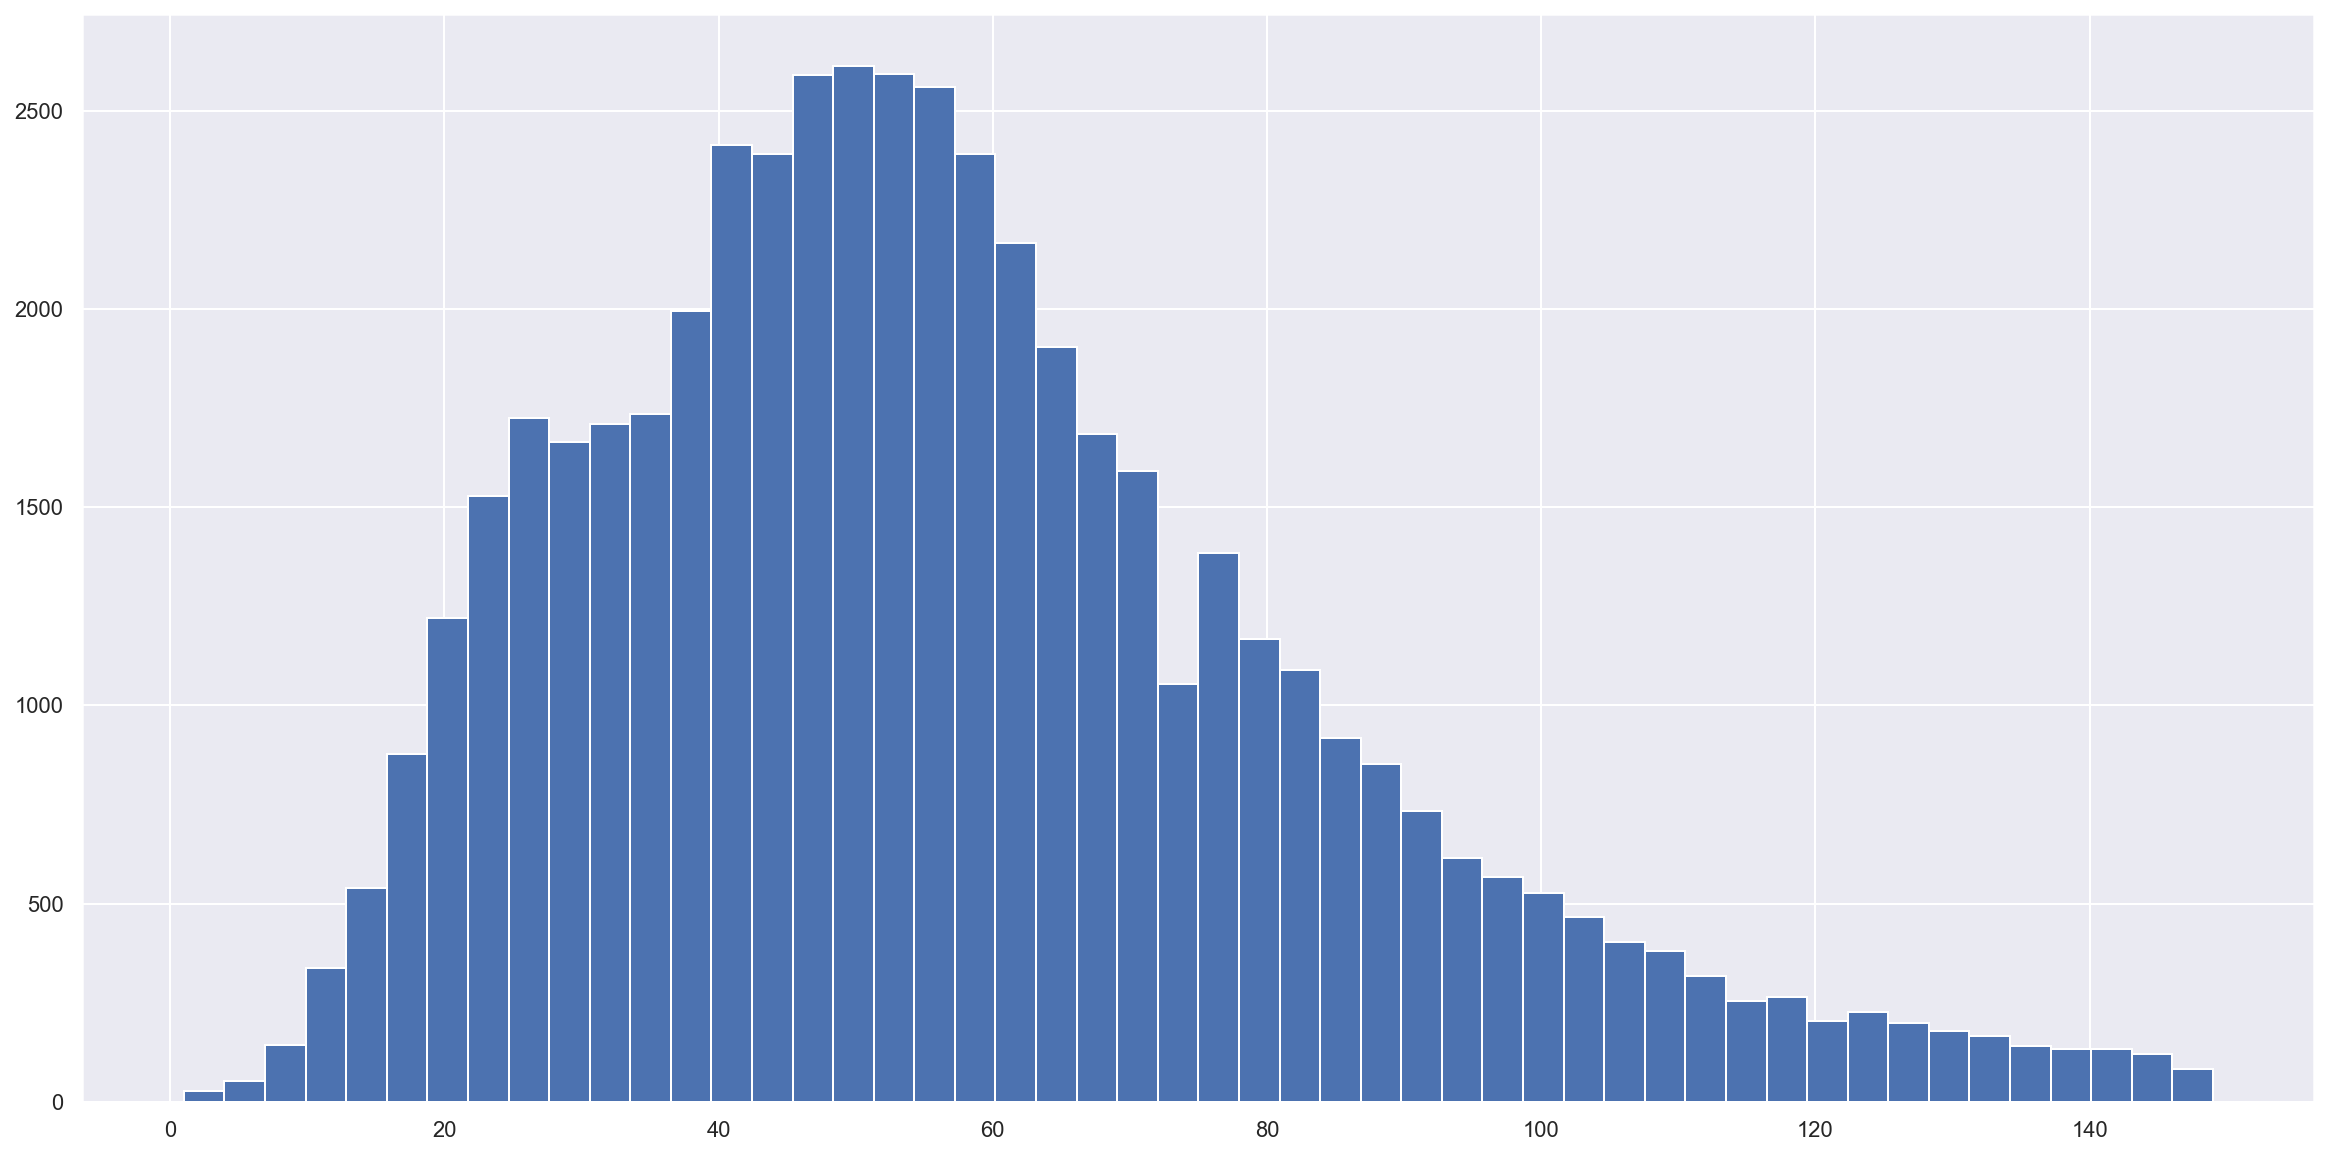

In [97]:
whole_sents = list(data['articles'])
token_sents = [s.split() for s in whole_sents]
token_len = [len(t) for t in token_sents]

print('어절 최대길이: {}'.format(np.max(token_len)))
print('어절 최소길이: {}'.format(np.min(token_len)))
print('어절 평균길이: {:.2f}'.format(np.mean(token_len)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(token_len)))
print('어절 중간길이: {}'.format(np.median(token_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(token_len, 10)))
print('제 3 사분위 길이: {}'.format(np.percentile(token_len, 90)))

plt.figure(figsize=(20,10))
plt.hist(token_len, bins=50)
plt.show()

- 하위 10에서 90까지

In [98]:
data['articles'] = data['articles'].apply(lambda x : x if (len(x.split()) >= 10) and (len(x.split()) <= 95)  else  np.nan)

In [99]:
data = data.dropna().reset_index(drop=True)
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
46067,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
46068,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
46069,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
46070,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


- 총 46072개

- 어절로 거른 본문 데이터에 대해 형태소 분석

- 형태소 분석 후 기초통계량 확인

In [100]:
morph_articles = data['articles'].apply(text_to_morphs)
morph_len = [len(t.split()) for t in morph_articles]

print('형태소 최대길이: {}'.format(np.max(morph_len)))
print('형태소 최소길이: {}'.format(np.min(morph_len)))
print('형태소 평균길이: {:.2f}'.format(np.mean(morph_len)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(morph_len)))
print('형태소 중간길이: {}'.format(np.median(morph_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(morph_len, 10)))
print('제 3 사분위 길이: {}'.format(np.percentile(morph_len, 99)))

형태소 최대길이: 226
형태소 최소길이: 10
형태소 평균길이: 84.92
형태소 길이 표준편차: 33.73
형태소 중간길이: 85.0
제 1 사분위 길이: 39.0
제 3 사분위 길이: 159.0


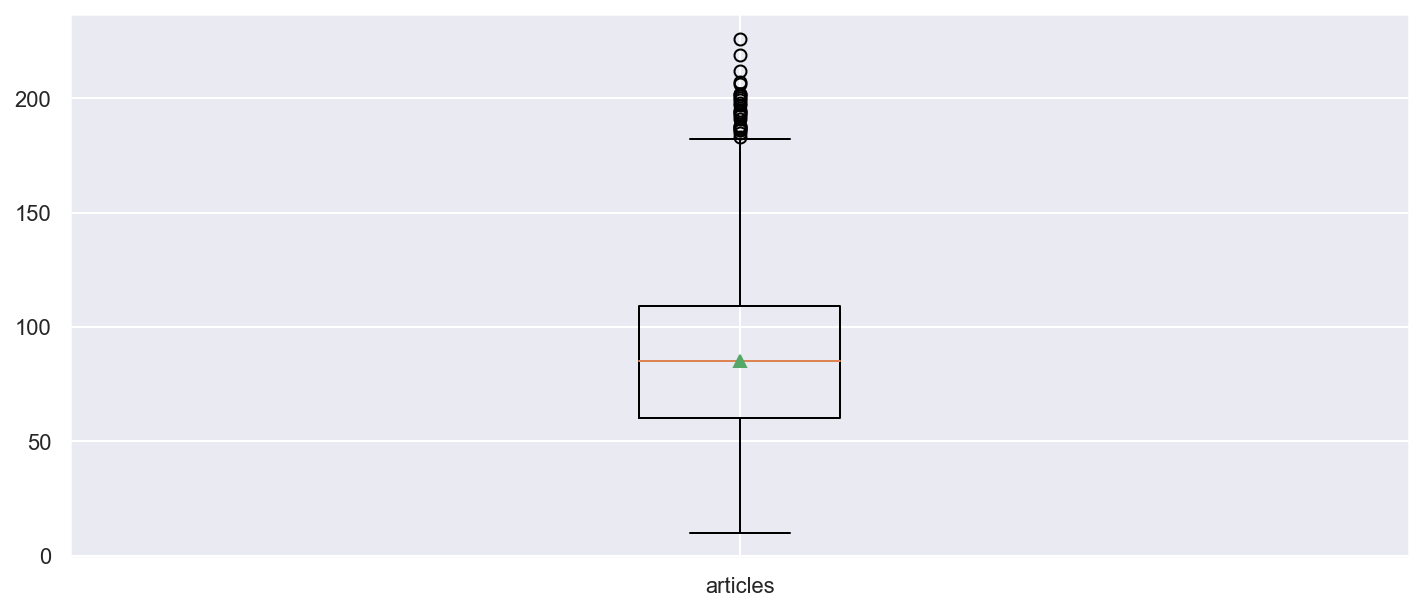

In [101]:
plt.figure(figsize=(12,5))
plt.boxplot([morph_len],
            labels=['articles'], showmeans=True)
plt.show()

In [116]:
data = data.drop([data.index[morph_len.index(226)]])
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
46067,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
46068,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
46069,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
46070,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [117]:
morph_articles = data['articles'].apply(text_to_morphs)
morph_len = [len(t.split()) for t in morph_articles]

print('형태소 최대길이: {}'.format(np.max(morph_len)))
print('형태소 최소길이: {}'.format(np.min(morph_len)))
print('형태소 평균길이: {:.2f}'.format(np.mean(morph_len)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(morph_len)))
print('형태소 중간길이: {}'.format(np.median(morph_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(morph_len, 10)))
print('제 3 사분위 길이: {}'.format(np.percentile(morph_len, 99)))

형태소 최대길이: 219
형태소 최소길이: 10
형태소 평균길이: 84.91
형태소 길이 표준편차: 33.72
형태소 중간길이: 85.0
제 1 사분위 길이: 39.0
제 3 사분위 길이: 159.0


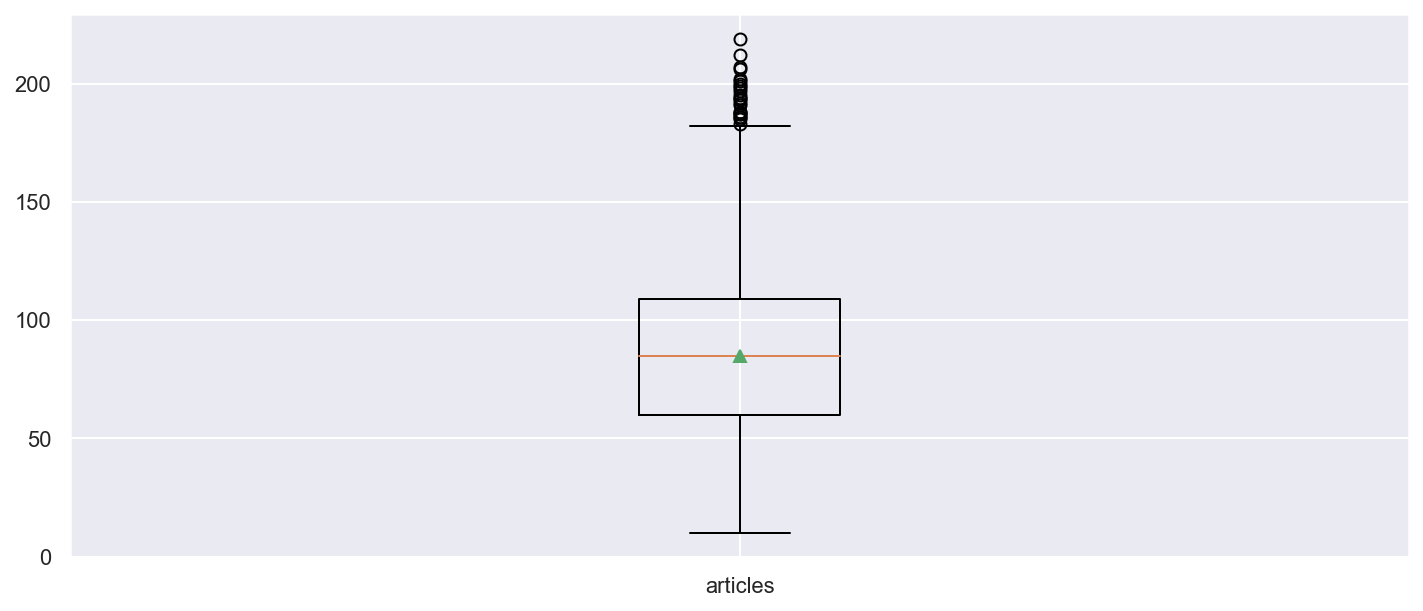

In [118]:
plt.figure(figsize=(12,5))
plt.boxplot([morph_len],
            labels=['articles'], showmeans=True)
plt.show()

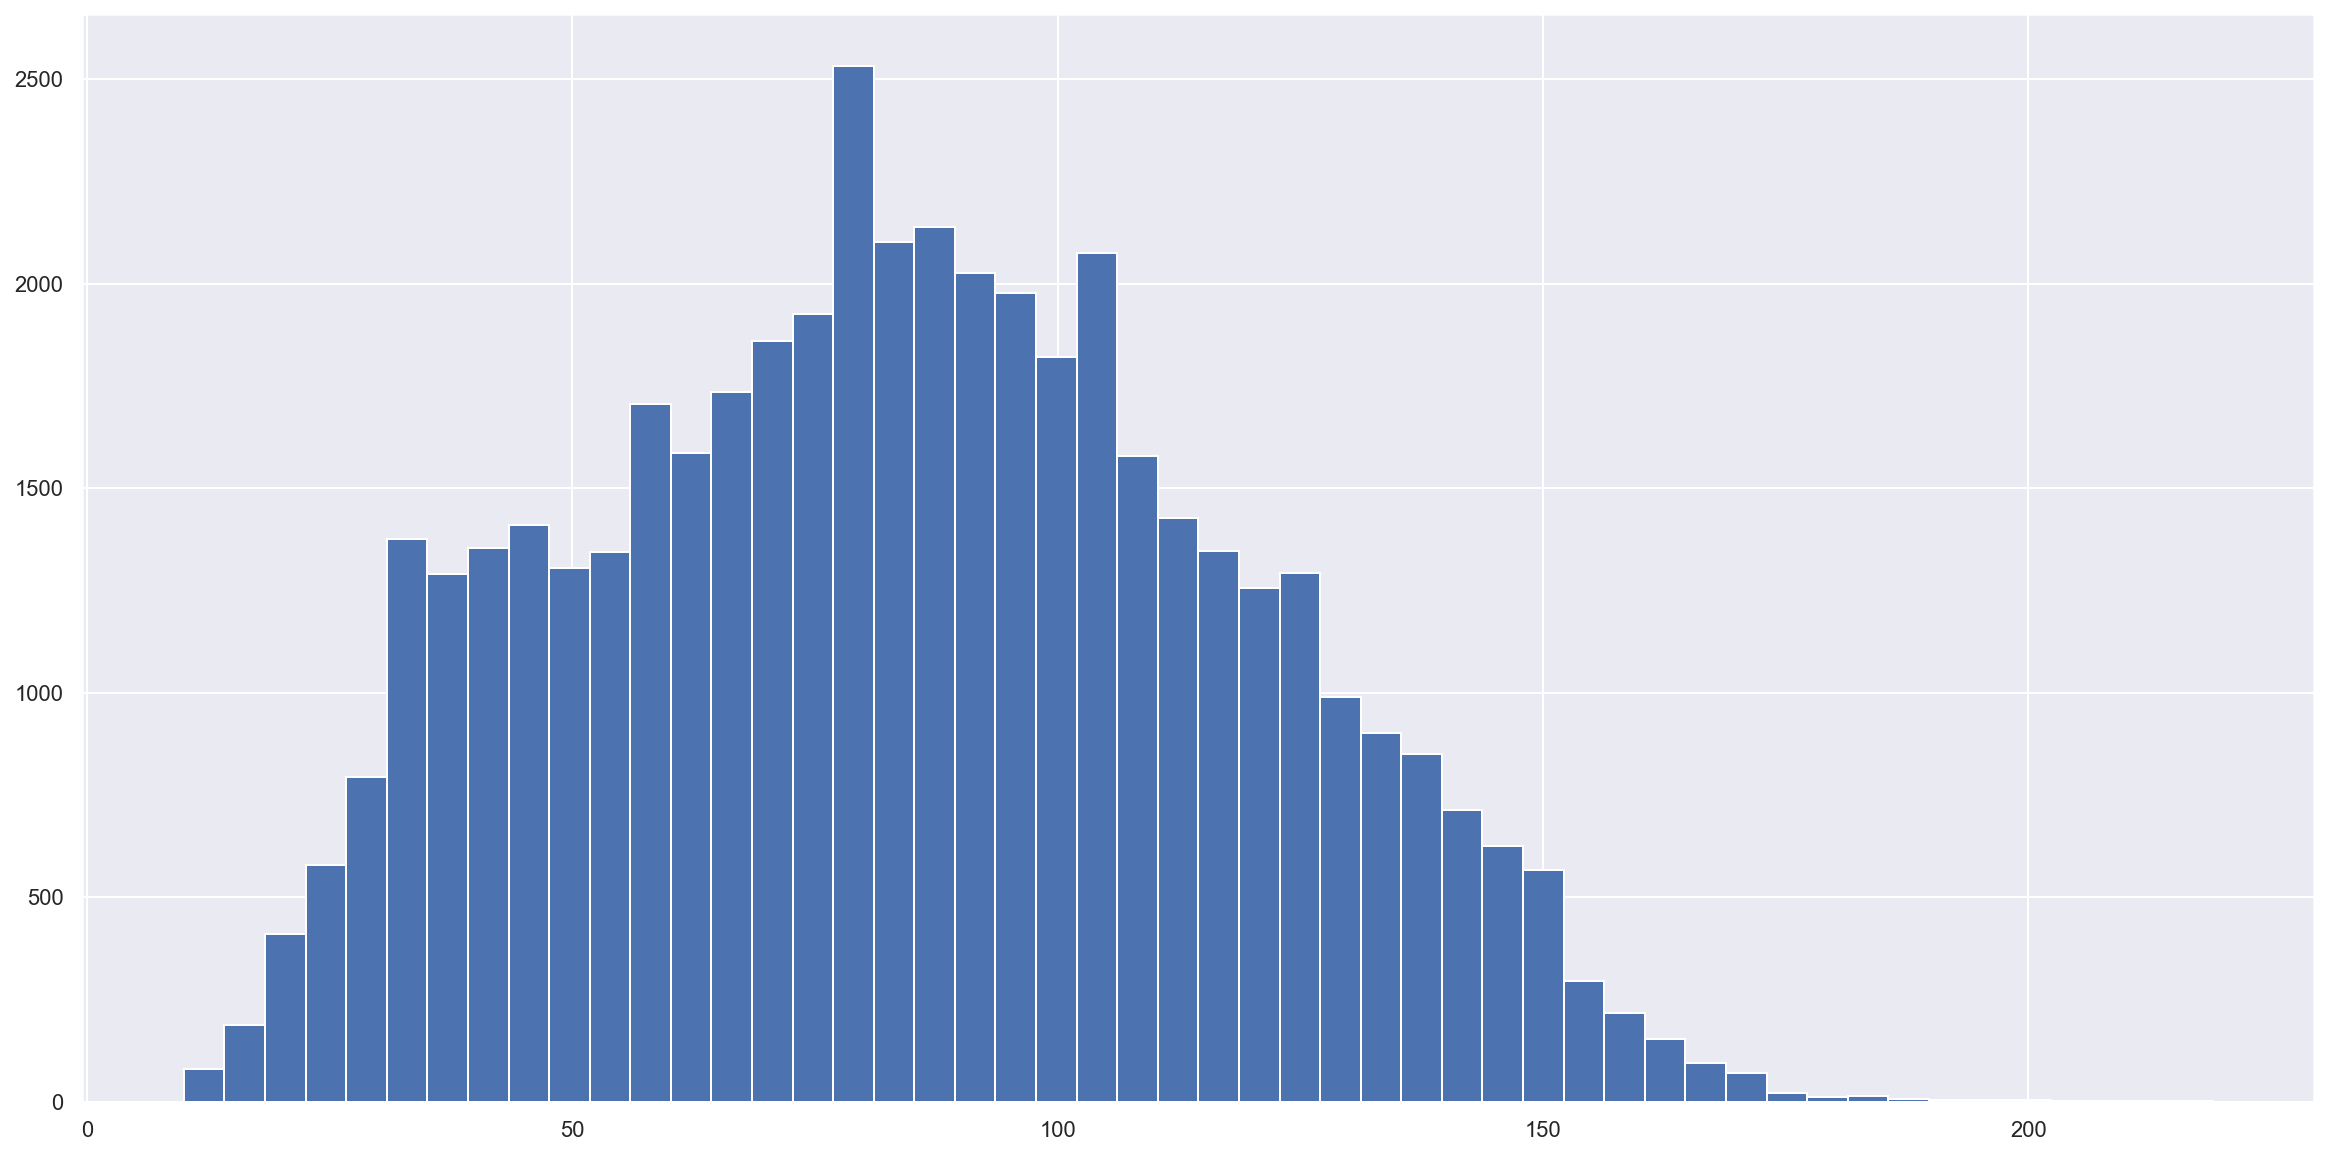

In [132]:
plt.figure(figsize=(20,10))
plt.hist(morph_len, bins=50)
plt.show()

## 제목 문장 길이에 대한 분석

In [142]:
whole_titles = list(data['titles'])
whole_titles[:20]

['파주시의회 행감 돌입 다양한 해법 대안 제시',
 '휴가철 방역대책 짧게 소규모로 나눠서',
 '마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에',
 '세월호 특검 서해해경청 목포해경 압수수색',
 '제주상의 관광협회 기반 지속가능경영 구축 속도',
 '이길호 김귀근 군포시의원 경비원보호 집중질의',
 '교사에 우리 부부였나 성희롱한 초등학교 교장',
 '유상철 투병 끝 별세 축구계 안타깝다 많이 보고싶을 것',
 '때리고 강제로 음식 먹인 유치원 교사 집행유예',
 '해외 매체도 유상철 추모 너무 빠른 이별',
 '연천 포천 가평 공노조 이재명 특별한 보상 원칙 안 지켰다 공공기관 이전 결과 강력 규탄',
 '세월호 특검 서해지방해경청 등 압수수색',
 '울주 0원 푸드마켓 개소 저소득층에 생필품 지원',
 '울주 관광택시 울주 잇다 발대 택시 12대 운영',
 '불 끈 화장실에 6살 아동 가둔 보육교사 입건 대기업 위탁 어린이집',
 '장애인 선수 상습 폭행한 실업팀 감독 집행유예',
 '울산교육청 4개 공공도서관 좌석 수 50 로 확대',
 '울산 노인시설 850여 곳 한 달 여 만에 운영 재개',
 '헤미메탈 로커에서 태극기 아이돌 그녀의 마지막 도전',
 '울산 오늘부터 거리두기 1 5단계 자정까지 영업 가능']

In [143]:
token_titles = [s.split() for s in whole_titles]
token_len_titles = [len(t) for t in token_titles]

In [144]:
print('어절 최대길이: {}'.format(np.max(token_len_titles)))
print('어절 최소길이: {}'.format(np.min(token_len_titles)))
print('어절 평균길이: {:.2f}'.format(np.mean(token_len_titles)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(token_len_titles)))
print('어절 중간길이: {}'.format(np.median(token_len_titles)))
print('제 1 사분위 길이: {}'.format(np.percentile(token_len_titles, 10)))
print('제 3 사분위 길이: {}'.format(np.percentile(token_len_titles, 75)))

어절 최대길이: 19
어절 최소길이: 2
어절 평균길이: 7.65
어절 길이 표준편차: 1.88
어절 중간길이: 8.0
제 1 사분위 길이: 5.0
제 3 사분위 길이: 9.0


- 어절이 1이면 제거 

In [141]:
data['titles'] = data['titles'].apply(lambda x : np.nan if len(x.split()) ==1 else x)
data = data.dropna().reset_index(drop=True)
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
46018,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
46019,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
46020,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
46021,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [146]:
data.to_csv('./data_in/data_v2.csv')
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
46018,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
46019,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
46020,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
46021,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [147]:
morph_titles = data['titles'].apply(text_to_morphs)

In [148]:
morph_len_titles = [len(t.split()) for t in morph_titles]

In [149]:
print('형태소 최대길이: {}'.format(np.max(morph_len_titles)))
print('형태소 최소길이: {}'.format(np.min(morph_len_titles)))
print('형태소 평균길이: {:.2f}'.format(np.mean(morph_len_titles)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(morph_len_titles)))
print('형태소 중간길이: {}'.format(np.median(morph_len_titles)))
print('제 1 사분위 길이: {}'.format(np.percentile(morph_len_titles, 10)))
print('제 3 사분위 길이: {}'.format(np.percentile(morph_len_titles, 75)))

형태소 최대길이: 24
형태소 최소길이: 2
형태소 평균길이: 10.55
형태소 길이 표준편차: 2.54
형태소 중간길이: 10.0
제 1 사분위 길이: 8.0
제 3 사분위 길이: 12.0


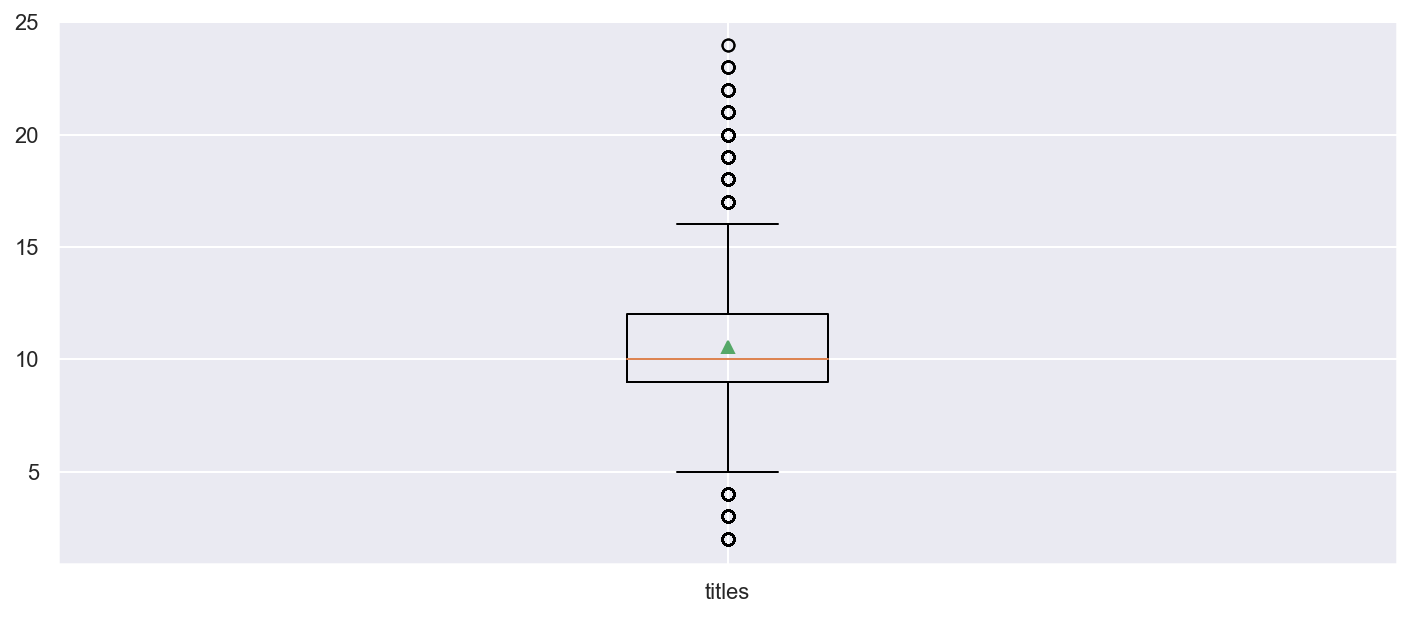

In [150]:
plt.figure(figsize=(12,5))
plt.boxplot([morph_len_titles],
            labels=['titles'], showmeans=True)
plt.show()

## 데이터어휘 빈도분석(wordcloud)

> **의미상 중요한 명사, 형용사, 동사만 따로 모은 후 빈도수 분석**

In [151]:
from tqdm import tqdm

In [152]:
articles_nva = []
titles_nva = []

In [9]:
for s in tqdm(list(data['articles'][:10000])):
    for token, tag in Okt().pos(s.replace(' ', '')):
        if tag in ['Noun','Adjective']:
            articles_nva.append(token)
            
articles_nva = ' '.join(articles_nva)

100%|██████████| 10000/10000 [1:03:10<00:00,  2.64it/s]


In [153]:
from konlpy.tag import Okt
for s in list(data['titles']):
    for token, tag in Okt().pos(s.replace(' ', '')):
        if tag in ['Noun','Adjective']:
            titles_nva.append(token)
titles_nva = ' '.join(titles_nva)

In [154]:
from wordcloud import WordCloud

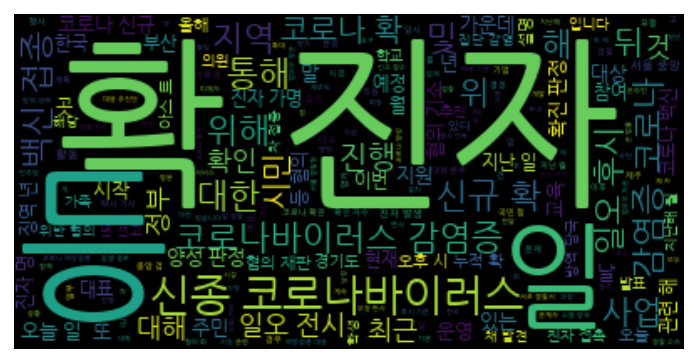

In [13]:
articles_wordcloud = WordCloud(font_path= './data_in/NanumGothic.ttf').generate(articles_nva)
plt.imshow(articles_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

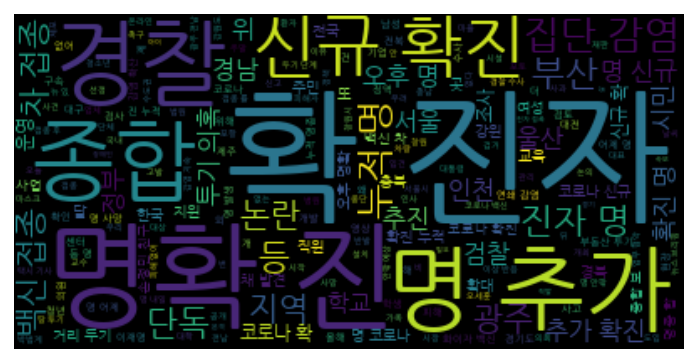

In [155]:
titles_wordcloud = WordCloud(font_path= './data_in/NanumGothic.ttf').generate(titles_nva)
plt.imshow(titles_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 이제부터 진짜 전처리

In [156]:
DATA_IN_PATH = './data_in/'

data = pd.read_csv('./data_in/data_v2.csv',encoding='utf-8')[['articles','titles']]
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
46018,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
46019,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
46020,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
46021,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [273]:
korean_stopwords = pd.read_csv('한국어불용어100 (1).txt', delimiter='\t', header=None)
korean_stopwords.columns = ['morph', 'tag', 'ratio']
korean_stopwords

,morph,tag,ratio
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898
...,...,...,...
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486


In [157]:
morph_articles = data['articles'].apply(text_to_morphs)

In [158]:
morph_len = [len(t.split()) for t in morph_articles]

In [159]:
print('형태소 최대길이: {}'.format(np.max(morph_len)))
print('형태소 최소길이: {}'.format(np.min(morph_len)))
print('형태소 평균길이: {:.2f} '.format(np.mean(morph_len)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(morph_len)))
print('형태소 중간길이: {}'.format(np.median(morph_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(morph_len, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(morph_len, 75)))

형태소 최대길이: 219
형태소 최소길이: 12
형태소 평균길이: 84.94 
형태소 길이 표준편차: 33.70
형태소 중간길이: 85.0
제 1 사분위 길이: 60.0
제 3 사분위 길이: 109.0


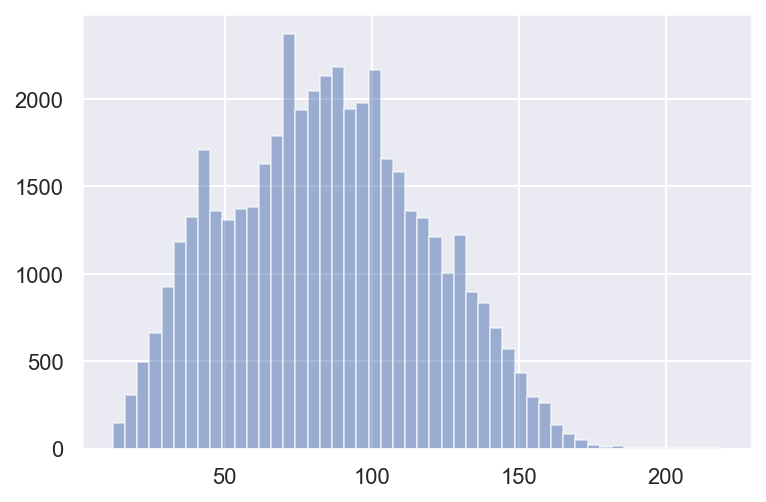

In [160]:
plt.hist(morph_len, bins=50, alpha=0.5)
plt.show()

- 0이 중간에 껴있는 애들 다 제거

In [178]:
data['articles'] = data['articles'].apply(lambda x : np.nan if x.count('0') >= 10 else x)
data = data.dropna().reset_index(drop=True)
data

,articles,titles
0,주요 일정으로는 7일 제1차 본회의에서 2020회계연도 결산승인안에 대한 제안 설명...,파주시의회 행감 돌입 다양한 해법 대안 제시
1,성수기를 피해 소규모 가족 단위로 짧게 정부가 발표한 휴가철 방역 대책의 핵심입니다...,휴가철 방역대책 짧게 소규모로 나눠서
2,웹툰 마음의 소리 와 조의 영역 으로 인기를 얻은 웹툰 작가 조석 38 이 폐결핵 ...,마음의 소리 조석 작가 덜컥 폐결핵 결국 담배 때문에
3,7일 법조계에 따르면 세월호 특검팀은 서해해경청과 목포해경에 검사와 수사관 등을 보...,세월호 특검 서해해경청 목포해경 압수수색
4,제주상공회의소 회장 양문석 와 제주도관광협회 회장 부동석 가 주최하고 제주도 제주도...,제주상의 관광협회 기반 지속가능경영 구축 속도
...,...,...
45488,이른바 검언유착 의혹 으로 구속기소된 이동재 전 채널 기자의 구속 기간이 4일 만료...,검언유착 의혹 이동재 4일 석방 구속 292일 만
45489,서울 김동은 기자 22년 차 배달기사 이씨 48 는 음식 배달을 위해 서울 모 초고...,영상 냄새난다고 화물용 승강기 타래요 도 넘은 갑질 에 뿔난 배달기사들
45490,서울 서울 중랑구에서 신종 코로나바이러스 감염증 코로나19 확진자가 9명 추가 발생...,중랑구서 확진자 9명 추가 2명은 광진구 음식점 관련
45491,국민건강보험공단의 전화상담 업무를 담당하고 있는 민간 위탁업체 소속 콜센터 직원 8...,콜센터 파업 장기화하나 건보공단 위탁업체 정직원 직고용 어려워


In [180]:
morph_articles = data['articles'].apply(text_to_morphs)
morph_len = [len(t.split()) for t in morph_articles]

In [196]:
print('형태소 최대길이: {}'.format(np.max(morph_len)))
print('형태소 최소길이: {}'.format(np.min(morph_len)))
print('형태소 평균길이: {:.2f} '.format(np.mean(morph_len)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(morph_len)))
print('형태소 중간길이: {}'.format(np.median(morph_len)))
print('제 1 사분위 길이: {}'.format(np.percentile(morph_len, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(morph_len, 90)))

형태소 최대길이: 206
형태소 최소길이: 12
형태소 평균길이: 84.61 
형태소 길이 표준편차: 33.60
형태소 중간길이: 84.0
제 1 사분위 길이: 59.0
제 3 사분위 길이: 131.0


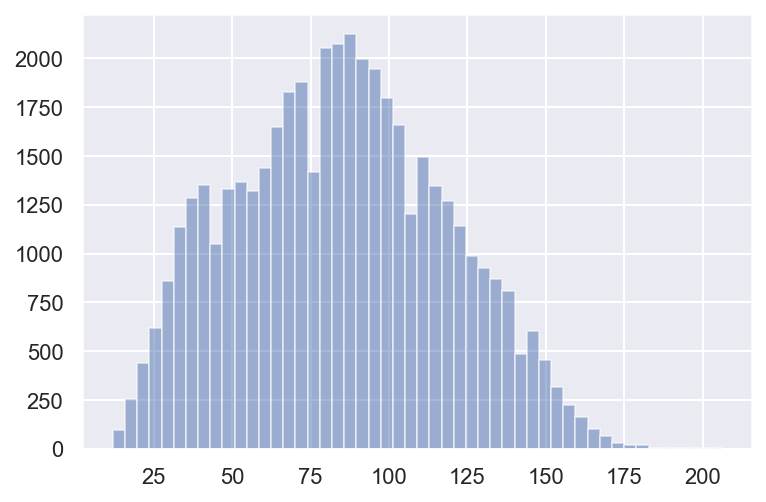

In [182]:
plt.hist(morph_len, bins=50, alpha=0.5)
plt.show()

--------------------------

In [183]:
morph_titles = data['titles'].apply(text_to_morphs)
morph_len_titles = [len(t.split()) for t in morph_titles]

In [192]:
print('형태소 최대길이: {}'.format(np.max(morph_len_titles)))
print('형태소 최소길이: {}'.format(np.min(morph_len_titles)))
print('형태소 평균길이: {:.2f}'.format(np.mean(morph_len_titles)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(morph_len_titles)))
print('형태소 중간길이: {}'.format(np.median(morph_len_titles)))
print('제 1 사분위 길이: {}'.format(np.percentile(morph_len_titles, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(morph_len_titles, 90)))

형태소 최대길이: 24
형태소 최소길이: 2
형태소 평균길이: 10.55
형태소 길이 표준편차: 2.53
형태소 중간길이: 10.0
제 1 사분위 길이: 9.0
제 3 사분위 길이: 14.0


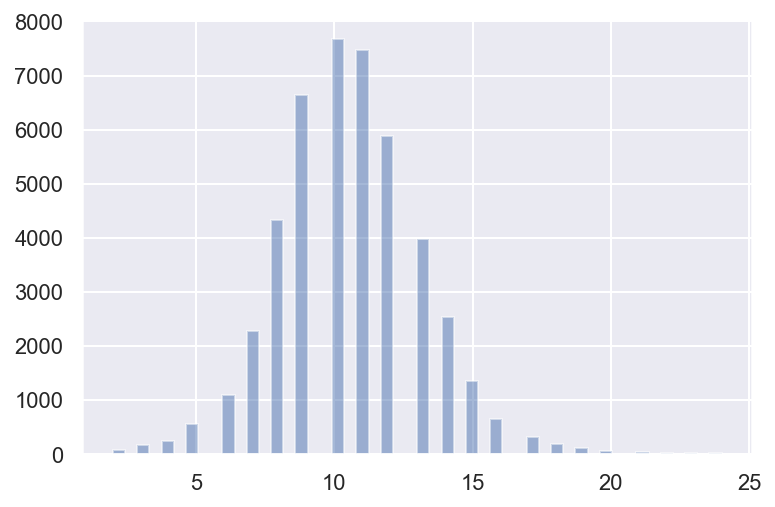

In [185]:
plt.hist(morph_len_titles, bins=50, alpha=0.5)
plt.show()

- encoder_input의 max len은 130
- decoder_input의 max len은 15

In [342]:
PATH = 'data_in/data_v2.csv'
ENC_VOCAB_PATH = 'data_in/enc_vocabulary.txt'
DEC_VOCAB_PATH = 'data_in/dec_vocabulary.txt'

In [343]:
FILTERS = "([~.,!?\"':;)(])"
PAD = '<PAD>'
STD = "<SOS>"
END = "<END>"
UNK = "<UNK>"

PAD_INDEX=0
STD_INDEX=1
END_INDEX=2
UNK_INDEX=3


MARKER = [PAD, STD, END, UNK]
CHANGE_FILTER = re.compile(FILTERS)

ENC_MAX_SEQUENCE = 130
DEC_MAX_SEQUENCE = 15

In [344]:
from preprocess import *

In [345]:
def load_data(path):
    # 판다스를 통해서 데이터를 불러온다.
    data_df = pd.read_csv(path)
    # 질문과 답변 열을 가져와 question과 answer에 넣는다.
    articles, titles = list(data_df['articles']), list(data_df['titles'])

    return articles, titles

In [346]:
inputs, outputs = load_data(PATH)

In [347]:
def data_tokenizer(data):
    # 토크나이징 해서 담을 배열 생성
    words = []
    for sentence in data:
        # FILTERS = "([~.,!?\"':;)(])"
        # 위 필터와 같은 값들을 정규화 표현식을
        # 통해서 모두 "" 으로 변환 해주는 부분이다.
        sentence = re.sub(CHANGE_FILTER, "", sentence)
        for word in sentence.split():
            words.append(word)
    # 토그나이징과 정규표현식을 통해 만들어진
    # 값들을 넘겨 준다.
    return [word for word in words if word]

In [348]:
korean_stopwords['morph']

0      이
1      있
2      하
3      것
4      들
      ..
95     원
96     잘
97    통하
98    소리
99     놓
Name: morph, Length: 100, dtype: object

In [349]:
def prepro_like_morphlized(data, method='Okt', stopwords=True):
    if method == 'Okt':
        morph_analyzer = Okt()
    if method == 'Komoran':
        morph_analyzer = Komoran()
    result_data = []
    if stopwords:
        for seq in tqdm(data):
            seq_ls = [morph for morph in morph_analyzer.morphs(seq) if morph not in korean_stopwords['morph']]
            morphlized_seq = " ".join(seq_ls)
            result_data.append(morphlized_seq)
    else:
        for seq in tqdm(data):
            morphlized_seq = " ".join(morph_analyzer.morphs(seq))
            result_data.append(morphlized_seq)

    return result_data

In [350]:
def make_vocabulary(vocabulary_list):
    # 리스트를 키가 단어이고 값이 인덱스인
    # 딕셔너리를 만든다.
    char2idx = {char: idx for idx, char in enumerate(vocabulary_list)}
    # 리스트를 키가 인덱스이고 값이 단어인
    # 딕셔너리를 만든다.
    idx2char = {idx: char for idx, char in enumerate(vocabulary_list)}
    # 두개의 딕셔너리를 넘겨 준다.
    return char2idx, idx2char

In [353]:
def load_vocabulary(path, vocab_enc_path, vocab_dec_path, tokenize_as_morph=False, method='Okt'):
    # 사전을 담을 배열 준비한다.
    enc_vocabulary_list = []
    dec_vocabulary_list = []
    # 사전을 구성한 후 파일로 저장 진행한다.
    # 그 파일의 존재 유무를 확인한다.
    if not os.path.exists(vocab_enc_path):
        # 이미 생성된 사전 파일이 존재하지 않으므로
        # 데이터를 가지고 만들어야 한다.
        # 그래서 데이터가 존재 하면 사전을 만들기 위해서
        # 데이터 파일의 존재 유무를 확인한다.
        if (os.path.exists(path)):
            # 데이터가 존재하니 판단스를 통해서
            # 데이터를 불러오자
            data_df = pd.read_csv(path, encoding='utf-8')
            # 판다스의 데이터 프레임을 통해서
            # 질문과 답에 대한 열을 가져 온다.
            articles, titles = list(data_df['articles']), list(data_df['titles'])
            if tokenize_as_morph:  # 형태소에 따른 토크나이져 처리
                print(method)
                article = prepro_like_morphlized(articles, method, stopwords=True)
                title = prepro_like_morphlized(titles, method, stopwords=False)
            data_articles = []
            data_titles = []
            # 질문과 답변을 extend을
            # 통해서 구조가 없는 배열로 만든다.
            data_articles.extend(article)
            data_titles.extend(title)
            # 토큰나이져 처리 하는 부분이다.
            words_articles = data_tokenizer(data_articles)
            words_titles = data_tokenizer(data_titles)
            # 공통적인 단어에 대해서는 모두
            # 필요 없으므로 한개로 만들어 주기 위해서
            # set해주고 이것들을 리스트로 만들어 준다.
            words_articles = list(set(words_articles))
            words_titles = list(set(words_titles))
            # 데이터 없는 내용중에 MARKER를 사전에
            # 추가 하기 위해서 아래와 같이 처리 한다.
            # 아래는 MARKER 값이며 리스트의 첫번째 부터
            # 순서대로 넣기 위해서 인덱스 0에 추가한다.
            # PAD = "<PADDING>"
            # STD = "<START>"
            # END = "<END>"
            # UNK = "<UNKNWON>"
            words_articles[:0] = MARKER
            words_titles[:0] = MARKER
        # 사전을 리스트로 만들었으니 이 내용을
        # 사전 파일을 만들어 넣는다.
        with open(vocab_enc_path, 'w', encoding='utf-8') as vocabulary_file:
            for word in words_articles:
                vocabulary_file.write(word + '\n')
                
        with open(vocab_dec_path, 'w', encoding='utf-8') as vocabulary_file:
            for word in words_titles:
                vocabulary_file.write(word + '\n')

    # 사전 파일이 존재하면 여기에서
    # 그 파일을 불러서 배열에 넣어 준다.
    with open(vocab_enc_path, 'r', encoding='utf-8') as vocabulary_file:
        for line in vocabulary_file:
            enc_vocabulary_list.append(line.strip())
            
    with open(vocab_dec_path, 'r', encoding='utf-8') as vocabulary_file:
        for line in vocabulary_file:
            dec_vocabulary_list.append(line.strip())

    # 배열에 내용을 키와 값이 있는
    # 딕셔너리 구조로 만든다.
    enc_char2idx, enc_idx2char = make_vocabulary(enc_vocabulary_list)
    dec_char2idx, dec_idx2char = make_vocabulary(dec_vocabulary_list)
    # 두가지 형태의 키와 값이 있는 형태를 리턴한다.
    # (예) 단어: 인덱스 , 인덱스: 단어)
    return (enc_char2idx, enc_idx2char, len(enc_char2idx)), (dec_char2idx, dec_idx2char, len(dec_char2idx))

In [352]:
PATH

'data_in/data_v2.csv'

In [284]:
enc_set, dec_set = load_vocabulary(PATH, ENC_VOCAB_PATH, DEC_VOCAB_PATH, tokenize_as_morph=True)

  0%|          | 25/46023 [00:00<06:09, 124.59it/s]

Okt


100%|██████████| 46023/46023 [00:58<00:00, 792.40it/s] 


In [285]:
enc_char2idx, enc_idx2char, enc_vocab_size = enc_set
dec_char2idx, dec_idx2char, dec_vocab_size = dec_set

In [325]:
enc_vocab_size, dec_vocab_size

(67989, 27759)

> **vocab size가 너무크다. 줄여야겠엉**
>> 일단 각 단어가 몇개씩 등장하는지나 한번 보자

In [355]:
articles, titles = inputs, outputs
morph_articles = prepro_like_morphlized(articles, stopwords=True)
morph_titles = prepro_like_morphlized(titles, stopwords=False)

100%|██████████| 46023/46023 [01:05<00:00, 703.90it/s]


In [361]:
len(morph_articles)

46023

In [357]:
enc_word_counts = {}
for word in data_tokenizer(morph_articles):
    if word in enc_char2idx.keys():
        if word in enc_word_counts:
            enc_word_counts[word] += 1
        else:
            enc_word_counts[word] = 1
    else:
        print(word)
        continue

In [358]:
set(enc_char2idx.keys() ) - set(enc_word_counts.keys())

{'<END>', '<PAD>', '<SOS>', '<UNK>'}

In [359]:
dec_word_counts = {}
for word in  data_tokenizer(morph_titles):
    if word in dec_char2idx:
        if word in dec_word_counts:
            dec_word_counts[word] += 1
        else:
            dec_word_counts[word] = 1
    else:
        continue

In [360]:
enc_morph_counts = pd.DataFrame([enc_word_counts.keys(), enc_word_counts.values()]).T
enc_morph_counts.columns = ['morph','count']
enc_morph_counts = enc_morph_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
enc_morph_counts

,morph,count
0,을,113956
1,이,95314
2,에,74956
3,를,66147
4,의,56851
...,...,...
67980,8201,1
67981,판가는,1
67982,냉담,1
67983,적응하는,1


In [395]:
enc_morph_under_7 =enc_morph_counts.loc[enc_morph_counts['count'] <= 7]

In [396]:
print('단어 집합(vocabulary)의 크기 :',len(enc_morph_counts))
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(7, len(enc_morph_under_7)))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(len(enc_morph_counts) - len(enc_morph_under_7)))
print("단어 집합에서 희귀 단어의 비율:", (len(enc_morph_under_7) / len(enc_morph_counts))*100)

단어 집합(vocabulary)의 크기 : 67985
등장 빈도가 7번 이하인 희귀 단어의 수: 49202
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18783
단어 집합에서 희귀 단어의 비율: 72.37184673089652


-> encoder 단어 집합 크기 18783으로 제한

In [364]:
dec_morph_counts = pd.DataFrame([dec_word_counts.keys(), dec_word_counts.values()]).T
dec_morph_counts.columns = ['morph','count']
dec_morph_counts = dec_morph_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
dec_morph_counts

,morph,count
0,명,9094
1,에,5502
2,서,4071
3,대,3575
4,확진,3137
...,...,...
27750,파죽지세,1
27751,나광국,1
27752,가르는,1
27753,끼어들어,1


In [376]:
dec_morph_under_5 =dec_morph_counts.loc[dec_morph_counts['count'] <= 5]
dec_morph_under_5

,morph,count
8301,맛있는,5
8302,해사,5
8303,계단,5
8304,최창학,5
8305,양호,5
...,...,...
27750,파죽지세,1
27751,나광국,1
27752,가르는,1
27753,끼어들어,1


In [375]:
print('단어 집합(vocabulary)의 크기 :',len(dec_morph_counts))
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(5, len(dec_morph_under_5)))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(len(dec_morph_counts) - len(dec_morph_under_5)))
print("단어 집합에서 희귀 단어의 비율:", (len(dec_morph_under_5) / len(dec_morph_counts))*100)

단어 집합(vocabulary)의 크기 : 27755
등장 빈도가 5번 이하인 희귀 단어의 수: 19454
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8301
단어 집합에서 희귀 단어의 비율: 70.09187533777698


- enc vocab size : 18783
- dec vocab size : 8301

In [397]:
enc_morph_2 =enc_morph_counts.loc[enc_morph_counts['count'] > 7]
dec_morph_2 =dec_morph_counts.loc[dec_morph_counts['count'] > 5]

In [413]:
enc_char2idx_df = pd.DataFrame([enc_char2idx.keys(), enc_char2idx.values()]).T
enc_char2idx_df.columns = ['morph','index']
enc_char2idx_df

,morph,index
0,<PAD>,0
1,<SOS>,1
2,<END>,2
3,<UNK>,3
4,혈통,5
...,...,...
67982,박시영,67984
67983,새내기,67985
67984,나이트,67986
67985,이어졌다는,67987


In [415]:
total = pd.merge(enc_char2idx_df, enc_morph_counts)
total['count'] = total['count'].apply(lambda x : np.nan if x <=7 else x)

,morph,index,count
0,혈통,5,9.0
1,이호재,7,NaN
2,시작,8,2913.0
3,잠겼습니다,9,NaN
4,돌산,10,NaN
...,...,...,...
67978,박시영,67984,NaN
67979,새내기,67985,NaN
67980,나이트,67986,NaN
67981,이어졌다는,67987,NaN


In [417]:
total = total.dropna().reset_index(drop=True)
total

,morph,index,count
0,혈통,5,9.0
1,시작,8,2913.0
2,말까지,16,18.0
3,모으고,17,60.0
4,최소한,18,61.0
...,...,...,...
18778,주한,67972,187.0
18779,연신,67973,13.0
18780,멍,67975,37.0
18781,44,67982,208.0


In [424]:
total_enc = total

In [422]:
dec_char2idx_df = pd.DataFrame([dec_char2idx.keys(), dec_char2idx.values()]).T
dec_char2idx_df.columns = ['morph','index']
dec_char2idx_df

,morph,index
0,<PAD>,0
1,<SOS>,1
2,<END>,2
3,<UNK>,3
4,심어놓고,4
...,...,...
27754,44,27754
27755,나란히,27755
27756,빼냐,27756
27757,새내기,27757


In [423]:
total_dec = pd.merge(dec_char2idx_df, dec_morph_counts)
total_dec['count'] = total_dec['count'].apply(lambda x : np.nan if x <=5 else x)
total_dec = total_dec.dropna().reset_index(drop=True)
total_dec

,morph,index,count
0,더딘,5,6.0
1,시작,6,375.0
2,트롤,12,7.0
3,뒤,20,312.0
4,조영남,24,9.0
...,...,...,...
8296,문학상,27746,7.0
8297,주한,27748,25.0
8298,멍,27750,24.0
8299,44,27754,36.0


In [481]:
total_enc

,morph,index,count
0,혈통,5,9.0
1,시작,8,2913.0
2,말까지,16,18.0
3,모으고,17,60.0
4,최소한,18,61.0
...,...,...,...
18778,주한,67972,187.0
18779,연신,67973,13.0
18780,멍,67975,37.0
18781,44,67982,208.0


In [518]:
total_enc['index'] = list(range(4, 18787))

In [536]:
total_enc['index'] = total_enc['index'].astype(str)

In [537]:
enc_char2idx = {}
for morph in total_enc.morph:
    enc_char2idx[morph] = total_enc['index'].loc[total_enc['morph']==morph].values[0]

In [538]:
len(enc_char2idx)

18783

In [539]:
enc_idx2char = {}
for idx in total_enc['index']:
    enc_idx2char[idx] = total_enc['morph'].loc[total_enc['index']==idx].values[0]

In [444]:
enc_vocab_size = len(enc_char2idx)

In [490]:
total_dec

,morph,index,count
0,더딘,5,6.0
1,시작,6,375.0
2,트롤,12,7.0
3,뒤,20,312.0
4,조영남,24,9.0
...,...,...,...
8296,문학상,27746,7.0
8297,주한,27748,25.0
8298,멍,27750,24.0
8299,44,27754,36.0


In [540]:
total_dec['index'] = list(range(4, 8305))
total_dec['index'] = total_dec['index'].astype(str)

In [541]:
dec_char2idx = {}
for morph in total_dec.morph:
    dec_char2idx[morph] = total_dec['index'].loc[total_dec['morph']==morph].values[0]

In [542]:
dec_idx2char = {}
for idx in total_dec['index']:
    dec_idx2char[idx] = total_dec['morph'].loc[total_dec['index']==idx].values[0]

In [448]:
dec_vocab_size = len(dec_char2idx)

In [453]:
MARKER

['<PAD>', '<SOS>', '<END>', '<UNK>']

In [543]:
enc_char2idx['<PAD>'] = 0
enc_char2idx['<SOS>'] = 1
enc_char2idx['<END>'] = 2
enc_char2idx['<UNK>'] = 3

dec_char2idx['<PAD>'] = 0
dec_char2idx['<SOS>'] = 1
dec_char2idx['<END>'] = 2
dec_char2idx['<UNK>'] = 3

enc_idx2char[0] = '<PAD>'
enc_idx2char[1] = '<SOS>'
enc_idx2char[2] = '<END>'
enc_idx2char[3] = '<UNK>'

dec_idx2char[0] = '<PAD>'
dec_idx2char[1] = '<SOS>'
dec_idx2char[2] = '<END>'
dec_idx2char[3] = '<UNK>'

In [474]:
enc_freq = {}
for morph in total_enc.morph:
    enc_freq[morph] = total_enc['count'].loc[total_enc['morph']==morph].values[0]
    
dec_freq = {}
for morph in total_dec.morph:
    dec_freq[morph] = total_dec['count'].loc[total_dec['morph']==morph].values[0]    

In [555]:
enc_vocab_size = len(enc_char2idx)
dec_vocab_size = len(dec_char2idx)

In [556]:
enc_vocab_size

18787

------------------------------

In [546]:
def enc_processing(value, dictionary, tokenize_as_morph=False, method='Okt'):
    # 인덱스 값들을 가지고 있는
    # 배열이다.(누적된다.)
    sequences_input_index = []
    # 하나의 인코딩 되는 문장의
    # 길이를 가지고 있다.(누적된다.)
    sequences_length = []
    # 형태소 토크나이징 사용 유무
    if tokenize_as_morph:
        print(method)
        value = prepro_like_morphlized(value,method=method, stopwords=True)

    # 한줄씩 불어온다.
    for sequence in value:
        # FILTERS = "([~.,!?\"':;)(])"
        # 정규화를 사용하여 필터에 들어 있는
        # 값들을 "" 으로 치환 한다.
        sequence = re.sub(CHANGE_FILTER, "", sequence)
        # 하나의 문장을 인코딩 할때
        # 가지고 있기 위한 배열이다.
        sequence_index = []
        # 문장을 스페이스 단위로
        # 자르고 있다.
        for word in sequence.split():
            # 잘려진 단어들이 딕셔너리에 존재 하는지 보고
            # 그 값을 가져와 sequence_index에 추가한다.
            if dictionary.get(word) is not None:
                sequence_index.extend([dictionary[word]])
            # 잘려진 단어가 딕셔너리에 존재 하지 않는
            # 경우 이므로 UNK(2)를 넣어 준다.
            else:
                sequence_index.extend([dictionary[UNK]])
        # 문장 제한 길이보다 길어질 경우 뒤에 토큰을 자르고 있다.
        if len(sequence_index) > ENC_MAX_SEQUENCE:
            sequence_index = sequence_index[:ENC_MAX_SEQUENCE]
        # 하나의 문장에 길이를 넣어주고 있다.
        sequences_length.append(len(sequence_index))
        # max_sequence_length보다 문장 길이가
        # 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (ENC_MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]
        # 인덱스화 되어 있는 값을
        # sequences_input_index에 넣어 준다.
        sequences_input_index.append(sequence_index)
    # 인덱스화된 일반 배열을 넘파이 배열로 변경한다.
    # 이유는 텐서플로우 dataset에 넣어 주기 위한
    # 사전 작업이다.
    # 넘파이 배열에 인덱스화된 배열과
    # 그 길이를 넘겨준다.
    return np.asarray(sequences_input_index), sequences_length

In [547]:
index_inputs, input_seq_len = enc_processing(inputs, enc_char2idx, tokenize_as_morph=True)

  0%|          | 8/46023 [00:00<09:58, 76.94it/s]

Okt


100%|██████████| 46023/46023 [11:00<00:00, 69.70it/s] 


input_seq_len 은 패딩 처리하기 전의 각 문장의 실제 길이

In [498]:
max(input_seq_len), len(index_inputs[100]), input_seq_len[100]

(130, 130, 93)

In [548]:
def dec_output_processing(value, dictionary, tokenize_as_morph=False,method='Okt'):
    # 인덱스 값들을 가지고 있는
    # 배열이다.(누적된다)
    sequences_output_index = []
    # 하나의 디코딩 입력 되는 문장의
    # 길이를 가지고 있다.(누적된다)
    sequences_length = []
    # 형태소 토크나이징 사용 유무
    if tokenize_as_morph:
        print(method)
        value = prepro_like_morphlized(value,method=method)
    # 한줄씩 불어온다.
    for sequence in value:
        # FILTERS = "([~.,!?\"':;)(])"
        # 정규화를 사용하여 필터에 들어 있는
        # 값들을 "" 으로 치환 한다.
        sequence = re.sub(CHANGE_FILTER, "", sequence)
        # 하나의 문장을 디코딩 할때 가지고
        # 있기 위한 배열이다.
        sequence_index = []
        # 디코딩 입력의 처음에는 START가 와야 하므로
        # 그 값을 넣어 주고 시작한다.
        # 문장에서 스페이스 단위별로 단어를 가져와서 딕셔너리의
        # 값인 인덱스를 넣어 준다.
        sequence_index = [dictionary[STD]] + [dictionary[word] if word in dictionary else dictionary[UNK] for word in sequence.split()]
        # 문장 제한 길이보다 길어질 경우 뒤에 토큰을 자르고 있다.
        if len(sequence_index) > DEC_MAX_SEQUENCE:
            sequence_index = sequence_index[:DEC_MAX_SEQUENCE]
        # 하나의 문장에 길이를 넣어주고 있다.
        sequences_length.append(len(sequence_index))
        # max_sequence_length보다 문장 길이가
        # 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (DEC_MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]
        # 인덱스화 되어 있는 값을
        # sequences_output_index 넣어 준다.
        sequences_output_index.append(sequence_index)
    # 인덱스화된 일반 배열을 넘파이 배열로 변경한다.
    # 이유는 텐서플로우 dataset에 넣어 주기 위한
    # 사전 작업이다.
    # 넘파이 배열에 인덱스화된 배열과 그 길이를 넘겨준다.
    return np.asarray(sequences_output_index), sequences_length

In [549]:
index_outputs, output_seq_len = dec_output_processing(outputs, dec_char2idx, tokenize_as_morph=True)

  0%|          | 90/46023 [00:00<00:51, 897.34it/s]

Okt


100%|██████████| 46023/46023 [01:08<00:00, 667.63it/s]


In [550]:
def dec_target_processing(value, dictionary, tokenize_as_morph=False,method='Okt'):
    # 인덱스 값들을 가지고 있는
    # 배열이다.(누적된다)
    sequences_target_index = []
    # 형태소 토크나이징 사용 유무
    if tokenize_as_morph:
        print(method)
        value = prepro_like_morphlized(value, method=method)
    # 한줄씩 불어온다.
    for sequence in value:
        # FILTERS = "([~.,!?\"':;)(])"
        # 정규화를 사용하여 필터에 들어 있는
        # 값들을 "" 으로 치환 한다.
        sequence = re.sub(CHANGE_FILTER, "", sequence)
        # 문장에서 스페이스 단위별로 단어를 가져와서
        # 딕셔너리의 값인 인덱스를 넣어 준다.
        # 디코딩 출력의 마지막에 END를 넣어 준다.
        sequence_index = [dictionary[word] if word in dictionary else dictionary[UNK] for word in sequence.split()]
        # 문장 제한 길이보다 길어질 경우 뒤에 토큰을 자르고 있다.
        # 그리고 END 토큰을 넣어 준다
        if len(sequence_index) >= DEC_MAX_SEQUENCE:
            sequence_index = sequence_index[:DEC_MAX_SEQUENCE - 1] + [dictionary[END]]
        else:
            sequence_index += [dictionary[END]]
        # max_sequence_length보다 문장 길이가
        # 작다면 빈 부분에 PAD(0)를 넣어준다.
        sequence_index += (DEC_MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]
        # 인덱스화 되어 있는 값을
        # sequences_target_index에 넣어 준다.
        sequences_target_index.append(sequence_index)
    # 인덱스화된 일반 배열을 넘파이 배열로 변경한다.
    # 이유는 텐서플로우 dataset에 넣어 주기 위한 사전 작업이다.
    # 넘파이 배열에 인덱스화된 배열과 그 길이를 넘겨준다.
    return np.asarray(sequences_target_index)

In [551]:
index_targets = dec_target_processing(outputs, dec_char2idx, tokenize_as_morph=True)

  0%|          | 81/46023 [00:00<00:57, 803.92it/s]

Okt


100%|██████████| 46023/46023 [01:13<00:00, 626.35it/s]


In [554]:
enc_vocab_size

18783

In [557]:
data_configs = {}
data_configs['enc_char2idx'] = enc_char2idx
data_configs['enc_idx2char'] = enc_idx2char

data_configs['dec_char2idx'] = dec_char2idx
data_configs['dec_idx2char'] = dec_idx2char

data_configs['enc_vocab_size'] = enc_vocab_size
data_configs['dec_vocab_size'] = dec_vocab_size

data_configs['enc_freq'] = enc_freq
data_configs['dec_freq'] = dec_freq

data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK

DATA_IN_PATH = './data_in/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS , 'wb'), index_targets)

In [558]:
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))